# Explanatory Data Analysis for VCU

In [87]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import difflib

In [89]:
data1=pd.read_excel('2024-01-29-12-40-PM-1000.xlsx')
data2 = pd.read_excel('PT_25_Sensor_Data_1706771237585.xlsx')

In [139]:
data1.info(), data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 443 entries, time[s] to mcu_soft_version_day[bit]
dtypes: float64(319), int64(122), object(2)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vin no                444 non-null    object        
 1   device id             444 non-null    object        
 2   vcu id                444 non-null    object        
 3   timestampist          444 non-null    datetime64[ns]
 4   firmware version      444 non-null    object        
 5   packet seq id         444 non-null    int64         
 6   charge status         444 non-null    int64         
 7   soc                   444 non-null    int64         
 8   current               444 non-null    int64         
 9   res capacity          444 non-null    int64         
 1

(None, None)

In [141]:
print("Column Names: \n")
for i in range(1, 443, 3):
    print(data1.columns[i])

Column Names: 

current[a]
full_capacity[ah]
soc[%]
total_voltage[v]
cycles_times[count]
reserved
running_times[hr]
soh[%]
packstatus
protection_reason
reserved.1
reserved1
reserved2
reserved.2
vmax[v]
vmax_number
vmin[v]
vmin_number
average_temperature[*c]
maximum_temperature[*c]
minimum_temperature[*c]
reserved[*c]
ic_temperature[*c]
pcb_temperature[*c]
t1[*c]
t2[*c]
t3[*c]
t4[*c]
t5[*c]
t6[*c]
vcell1_voltage[v]
vcell2_voltage[v]
vcell3_voltage[v]
vcell4_voltage[v]
vcell5_voltage[v]
vcell6_voltage[v]
vcell7_voltage[v]
vcell8_voltage[v]
vcell10_voltage[v]
vcell11_voltage[v]
vcell12_voltage[v]
vcell9_voltage[v]
vcell13_voltage[v]
vcell14_voltage[v]
charger_output_current[a]
charger_output_voltage[v]
control_charger_output
reserved.3
reserved_1
reserved_2
break_oil_intx
dte
vehicle_mode[indication]
tripb_tx
tripa_tx[km]
odo_tx
speed_tx
mode_tx
soc_tx[%]
speed_rpm[km]
cfg_max_dcbuscurrent_tx[amps]
cfg_max_powermodespeed_tx[rpm]
cfg_max_phasecurrent_tx[amps]
cfg_max_drivemodespeed_tx[rpm]

In [143]:
data2.head()

,vin no,device id,vcu id,timestampist,firmware version,packet seq id,charge status,soc,current,res capacity,...,range available,ride mode,internbattery,loadstatus,runningcurrent,currentpropo,altitude,signal strength,latitude,longitude
0,PT 25,CM_862430058817764,CBCC42K00127,2024-01-29 12:40:00,V1.2.0_TIL_200AH,338,1,1,10,2,...,1,4,4.007814,100,0,0,0,26,1306.737427,8008.763672
1,PT 25,CM_862430058817764,CBCC42K00127,2024-01-29 12:41:00,V1.2.0_TIL_200AH,339,1,1,10,2,...,1,4,4.005934,100,0,0,0,26,1306.736694,8008.764648
2,PT 25,CM_862430058817764,CBCC42K00127,2024-01-29 12:42:00,V1.2.0_TIL_200AH,340,1,1,40,2,...,1,4,4.007546,100,0,0,0,26,1306.737061,8008.764648
3,PT 25,CM_862430058817764,CBCC42K00127,2024-01-29 12:43:00,V1.2.0_TIL_200AH,341,1,1,40,2,...,1,4,4.002711,100,0,0,0,27,1306.733887,8008.764160
4,PT 25,CM_862430058817764,CBCC42K00127,2024-01-29 12:44:00,V1.2.0_TIL_200AH,342,1,2,40,4,...,3,4,4.008889,100,0,0,0,27,1306.732788,8008.765137


In [145]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
time[s],999.0,254.421489,147.014486,0.161715,127.296721,254.417945,381.547652,508.686096
current[a],999.0,33.815816,35.785294,0.000000,0.000000,12.000000,75.000000,119.000000
unnamed: 2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time[s].1,999.0,254.421489,147.014486,0.161715,127.296721,254.417945,381.547652,508.686096
full_capacity[ah],999.0,200.000000,0.000000,200.000000,200.000000,200.000000,200.000000,200.000000
...,...,...,...,...,...,...,...,...
time[s].146,999.0,301.052474,132.327592,0.315420,260.062214,301.052474,343.175500,600.749005
mcu_soft_version_hour[bit],999.0,18.000000,0.000000,18.000000,18.000000,18.000000,18.000000,18.000000
unnamed: 440,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time[s].147,999.0,301.052474,132.327592,0.315420,260.062214,301.052474,343.175500,600.749005


In [147]:
data2.describe().T

,count,mean,min,25%,50%,75%,max,std
timestampist,444,2024-01-29 17:40:30.675675392,2024-01-29 12:40:00,2024-01-29 14:30:45,2024-01-29 16:36:30,2024-01-29 22:24:15,2024-01-29 23:59:00,NaN
packet seq id,444.0,557.042793,338.0,448.75,559.5,668.25,764.0,124.8496
charge status,444.0,1.394144,1.0,1.0,1.0,2.0,4.0,0.665202
soc,444.0,60.957207,1.0,37.75,66.0,86.0,100.0,29.793351
current,444.0,35.855856,0.0,39.0,39.0,39.0,177.0,18.339215
res capacity,444.0,121.914414,2.0,75.5,132.0,172.0,200.0,59.586702
ignition,444.0,0.304054,0.0,0.0,0.0,1.0,1.0,0.460525
odometer,444.0,30051.274775,30042.0,30042.0,30042.0,30049.25,30110.0,17.935832
battery pack voltage,444.0,54.056419,46.56,51.3875,54.13,56.8725,59.09,3.198449
no. of cells,444.0,14.0,14.0,14.0,14.0,14.0,14.0,0.0


In [151]:
count1 = 0
count2 = 0

for i in range(1, 443, 3):
    col_name = data1.columns[i]
    desc = data1[[col_name]].describe().T
    count1 += 1
    if 'std' in desc.columns:
        std_dev = desc['std'].values[0]
        if std_dev == 0:
            count2 += 1
    
    headers = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    desc_flat = desc.values.flatten()
    stats = ', '.join([f"{header}: {stat:.2f}" if isinstance(stat, (int, float)) else f"{header}: {stat}" 
                       for header, stat in zip(headers, desc_flat)])
    print(f"Column: {col_name}\n{stats}\n")

print("Total Columns Checked: %d" % count1)
print("Columns with '0' Std Dev: %d" % count2)

Column: current[a]
count: 999.00, mean: 33.82, std: 35.79, min: 0.00, 25%: 0.00, 50%: 12.00, 75%: 75.00, max: 119.00

Column: full_capacity[ah]
count: 999.00, mean: 200.00, std: 0.00, min: 200.00, 25%: 200.00, 50%: 200.00, 75%: 200.00, max: 200.00

Column: soc[%]
count: 999.00, mean: 10.64, std: 0.67, min: 10.00, 25%: 10.00, 50%: 11.00, 75%: 11.00, max: 12.00

Column: total_voltage[v]
count: 999.00, mean: 48.68, std: 0.22, min: 48.09, 25%: 48.51, 50%: 48.70, 75%: 48.82, max: 49.16

Column: cycles_times[count]
count: 999.00, mean: 74.00, std: 0.00, min: 74.00, 25%: 74.00, 50%: 74.00, 75%: 74.00, max: 74.00

Column: reserved
count: 999.00, mean: 11319.00, std: 0.00, min: 11319.00, 25%: 11319.00, 50%: 11319.00, 75%: 11319.00, max: 11319.00

Column: running_times[hr]
count: 999.00, mean: 0.00, std: 0.00, min: 0.00, 25%: 0.00, 50%: 0.00, 75%: 0.00, max: 0.00

Column: soh[%]
count: 999.00, mean: 96.00, std: 0.00, min: 96.00, 25%: 96.00, 50%: 96.00, 75%: 96.00, max: 96.00

Column: packstatus


The above program checks for the following things:
    Number of columns with actual data = 148
    
Columns with Standard Deviation as '0' = 107


In [153]:
# Loop through every column in the DataFrame
for col_name in data1.columns:
    
    # Check if the column contains any missing values
    if data1[col_name].isnull().sum() > 0:
        if data1[col_name].dtype in ['float64', 'int64']:  # Numeric columns (float and int)
            data1[col_name].fillna(data1[col_name].mean(), inplace=True)  # Fill missing values with mean
            print(f"Filled missing values in numeric column '{col_name}' with the mean.")
        elif data1[col_name].dtype == 'object':  # Non-numeric columns (object type)
            data1[col_name].fillna(data1[col_name].mode()[0], inplace=True)  # Fill missing values with mode
            print(f"Filled missing values in non-numeric column '{col_name}' with the mode.")
    else:
        print(f"No missing values in column '{col_name}'.")

No missing values in column 'time[s]'.
No missing values in column 'current[a]'.
Filled missing values in numeric column 'unnamed: 2' with the mean.
No missing values in column 'time[s].1'.
No missing values in column 'full_capacity[ah]'.
Filled missing values in numeric column 'unnamed: 5' with the mean.
No missing values in column 'time[s].2'.
No missing values in column 'soc[%]'.
Filled missing values in numeric column 'unnamed: 8' with the mean.
No missing values in column 'time[s].3'.
No missing values in column 'total_voltage[v]'.
Filled missing values in numeric column 'unnamed: 11' with the mean.
No missing values in column 'time[s].4'.
No missing values in column 'cycles_times[count]'.
Filled missing values in numeric column 'unnamed: 14' with the mean.
No missing values in column 'time[s].5'.
No missing values in column 'reserved'.
Filled missing values in numeric column 'unnamed: 17' with the mean.
No missing values in column 'time[s].6'.
No missing values in column 'running

C:\Users\shett\AppData\Local\Temp\ipykernel_3224\1903887953.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1[col_name].fillna(data1[col_name].mean(), inplace=True)  # Fill missing values with mean


The above program is used to fill the null values present in the dataset which may affect readability.

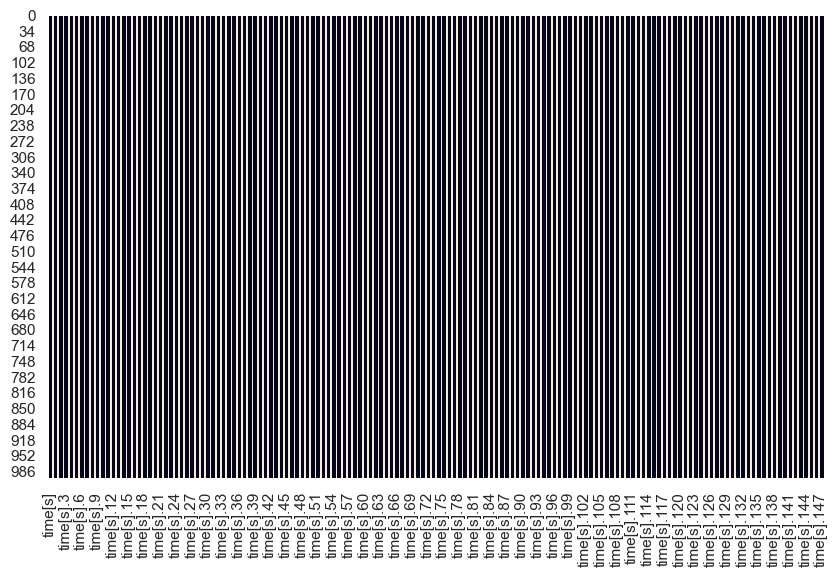

In [155]:
plt.figure(figsize=(10,6))
sns.heatmap(data1.isnull(), cbar=False)
plt.show()

Note:
All the null values present are filled 

In [15]:
# Remove the prefix and keep the actual column name
# Save changes directly to the existing Excel file (overwrite)
data1.columns = data1.columns.str.split('::').str[-1]  # Rename the columns
data1.to_excel('ecuData.xlsx', index=False)  # Overwrite the existing file

Note : Above step simplifies the column name by removing "BMS_STD_CAN_DB::Battery_Status_Information_0x0201" from each column's name for better readability.

In [33]:
# Replace common placeholder values (like empty strings and spaces) with NaN in `df1`
data1.replace(["", " ", 0], pd.NA, inplace=True)

    In the next section a set of mappings are created between the 2 datasets for columns that hold related values. These mappings are then used to to compute the average and the median of all the data sent by the ECU that transmits data every few milliseconds. Additionally the mean and median are then compared with the value stored on the cloud by the VCU to check for any deviations.

In [161]:
# Predefined mapping
predefined_mapping = {
    'current[a]': 'current',
    'soc[%]': 'soc',
    'full_capacity[ah]': 'res capacity',
    'vcell1_voltage[v]': 'cellvoltage1',
    'vcell2_voltage[v]': 'cellvoltage2',
    'vcell3_voltage[v]': 'cellvoltage3',
    'vcell4_voltage[v]': 'cellvoltage4',
    'vcell5_voltage[v]': 'cellvoltage5',
    'vcell6_voltage[v]': 'cellvoltage6',
    'vcell7_voltage[v]': 'cellvoltage7',
    'vcell8_voltage[v]': 'cellvoltage8',
    'vcell9_voltage[v]': 'cellvoltage9',
    'vcell10_voltage[v]': 'cellvoltage10',
    'vcell11_voltage[v]': 'cellvoltage11',
    'vcell12_voltage[v]': 'cellvoltage12',
    'vcell13_voltage[v]': 'cellvoltage13',
    'vcell14_voltage[v]': 'cellvoltage14',
    'total_voltage[v]': 'battery pack voltage',
    'vmin[v]': 'mincellvoltage',
    'vmax[v]': 'maxcellvoltage',
    'vmin_number': 'mincellid',
    'vmax_number': 'maxcellid',
    'cycles_times[count]': 'charge cycle',
    'average_temperature[*c]': 'temperature',
    'maximum_temperature[*c]': 'maxcelltemp',
    'minimum_temperature[*c]': 'mincelltemp',
    't1[*c]': 'temp1',
    't2[*c]': 'temp2',
    't3[*c]': 'temp3',
    't4[*c]': 'temp4',
    't5[*c]': 'temp5',
    't6[*c]': 'temp6',
    'dte': 'range available'
}

# Load datasets
file1_path = "2024-01-29-12-40-PM-1000.xlsx"
file2_path = "PT_25_Sensor_Data_1706771237585.xlsx"
data1 = pd.read_excel(file1_path)
data2 = pd.read_excel(file2_path)

# Standardize column names (strip spaces and convert to lowercase)
data1.columns = data1.columns.str.strip().str.lower()
data2.columns = data2.columns.str.strip().str.lower()

# Validate columns against predefined mapping
missing_columns_data1 = [col for col in predefined_mapping.keys() if col not in data1.columns]
missing_columns_data2 = [col for col in predefined_mapping.values() if col not in data2.columns]

if missing_columns_data1:
    raise KeyError(f"The following columns are missing in Dataset 1: {missing_columns_data1}")
if missing_columns_data2:
    raise KeyError(f"The following columns are missing in Dataset 2: {missing_columns_data2}")

# Filter Dataset 1 to include only mapped columns
data1_filtered = data1[['time[s]'] + list(predefined_mapping.keys())].dropna()

# Ensure TimestampIST in Dataset 2 is datetime
data2["timestampist"] = pd.to_datetime(data2["timestampist"], errors="coerce")

# Start timestamp for Dataset 1
start_time = pd.Timestamp("2024-01-29 12:40:00")

# Function to aggregate Dataset 1
def aggregate_60s_interval(df, start_time):
    df["absolute_time"] = start_time + pd.to_timedelta(df["time[s]"], unit="s")
    df["time_group"] = df["absolute_time"].dt.floor("60s")
    aggregated_mean = df.groupby("time_group").mean().reset_index()
    aggregated_median = df.groupby("time_group").median().reset_index()
    return aggregated_mean, aggregated_median

# Filter Dataset 2 to match time range of Dataset 1
time_max = start_time + pd.Timedelta(data1_filtered["time[s]"].max(), unit="s")
data2_filtered = data2[
    (data2["timestampist"] >= start_time) & (data2["timestampist"] <= time_max)
]

# Debugging: Check filtered Dataset 2 range
print("Dataset 2 filtered TimestampIST range:", data2_filtered["timestampist"].min(), "-", data2_filtered["timestampist"].max())

# Process predefined mappings
formatted_results = []

for col1, col2 in predefined_mapping.items():
    print(f"Processing column: {col1} (Dataset 1) -> {col2} (Dataset 2)")
    
    # Aggregate Dataset 1 for the current column
    data1_subset = data1_filtered[["time[s]", col1]].dropna()
    data1_aggregated_mean, data1_aggregated_median = aggregate_60s_interval(data1_subset, start_time)
    
    # Merge with Dataset 2
    comparison_mean = pd.merge(
        data1_aggregated_mean,
        data2_filtered[["timestampist", col2]],
        left_on="time_group",
        right_on="timestampist",
        how="inner",
    )
    comparison_median = pd.merge(
        data1_aggregated_median,
        data2_filtered[["timestampist", col2]],
        left_on="time_group",
        right_on="timestampist",
        how="inner",
    )
    
    # Combine results for both mean and median
    if not comparison_mean.empty and not comparison_median.empty:
        for idx, row_mean in comparison_mean.iterrows():
            # Find corresponding median row for the same timestamp
            row_median = comparison_median.loc[comparison_median["time_group"] == row_mean["time_group"]].iloc[0]
            
            formatted_results.append({
                "Timestamp": row_mean["time_group"],
                "Data Column": col1,
                "Mean": row_mean[col1],
                "Mean Deviation": row_mean[col1] - row_mean[col2],
                "Median": row_median[col1],
                "Median Deviation": row_median[col1] - row_median[col2],
            })
    
    # Add a blank row to separate data columns
    formatted_results.append({
        "Timestamp": None,
        "Data Column": None,
        "Mean": None,
        "Mean Deviation": None,
        "Median": None,
        "Median Deviation": None,
    })

# Display results in the desired format
if formatted_results:
    results_df = pd.DataFrame(formatted_results)
    print(results_df)
    
    # Optionally save to Excel
    results_df.to_excel("results.xlsx", index=False)
    print("Results saved to 'results.xlsx'")
else:
    print("No data to display. Check your datasets and mapping.")


Dataset 2 filtered TimestampIST range: 2024-01-29 12:40:00 - 2024-01-29 12:48:00
Processing column: current[a] (Dataset 1) -> current (Dataset 2)
Processing column: soc[%] (Dataset 1) -> soc (Dataset 2)
Processing column: full_capacity[ah] (Dataset 1) -> res capacity (Dataset 2)
Processing column: vcell1_voltage[v] (Dataset 1) -> cellvoltage1 (Dataset 2)
Processing column: vcell2_voltage[v] (Dataset 1) -> cellvoltage2 (Dataset 2)
Processing column: vcell3_voltage[v] (Dataset 1) -> cellvoltage3 (Dataset 2)
Processing column: vcell4_voltage[v] (Dataset 1) -> cellvoltage4 (Dataset 2)
Processing column: vcell5_voltage[v] (Dataset 1) -> cellvoltage5 (Dataset 2)
Processing column: vcell6_voltage[v] (Dataset 1) -> cellvoltage6 (Dataset 2)
Processing column: vcell7_voltage[v] (Dataset 1) -> cellvoltage7 (Dataset 2)
Processing column: vcell8_voltage[v] (Dataset 1) -> cellvoltage8 (Dataset 2)
Processing column: vcell9_voltage[v] (Dataset 1) -> cellvoltage9 (Dataset 2)
Processing column: vcell10_

C:\Users\shett\AppData\Local\Temp\ipykernel_3224\1779834191.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cleaned["Timestamp"] = pd.to_datetime(results_cleaned["Timestamp"])


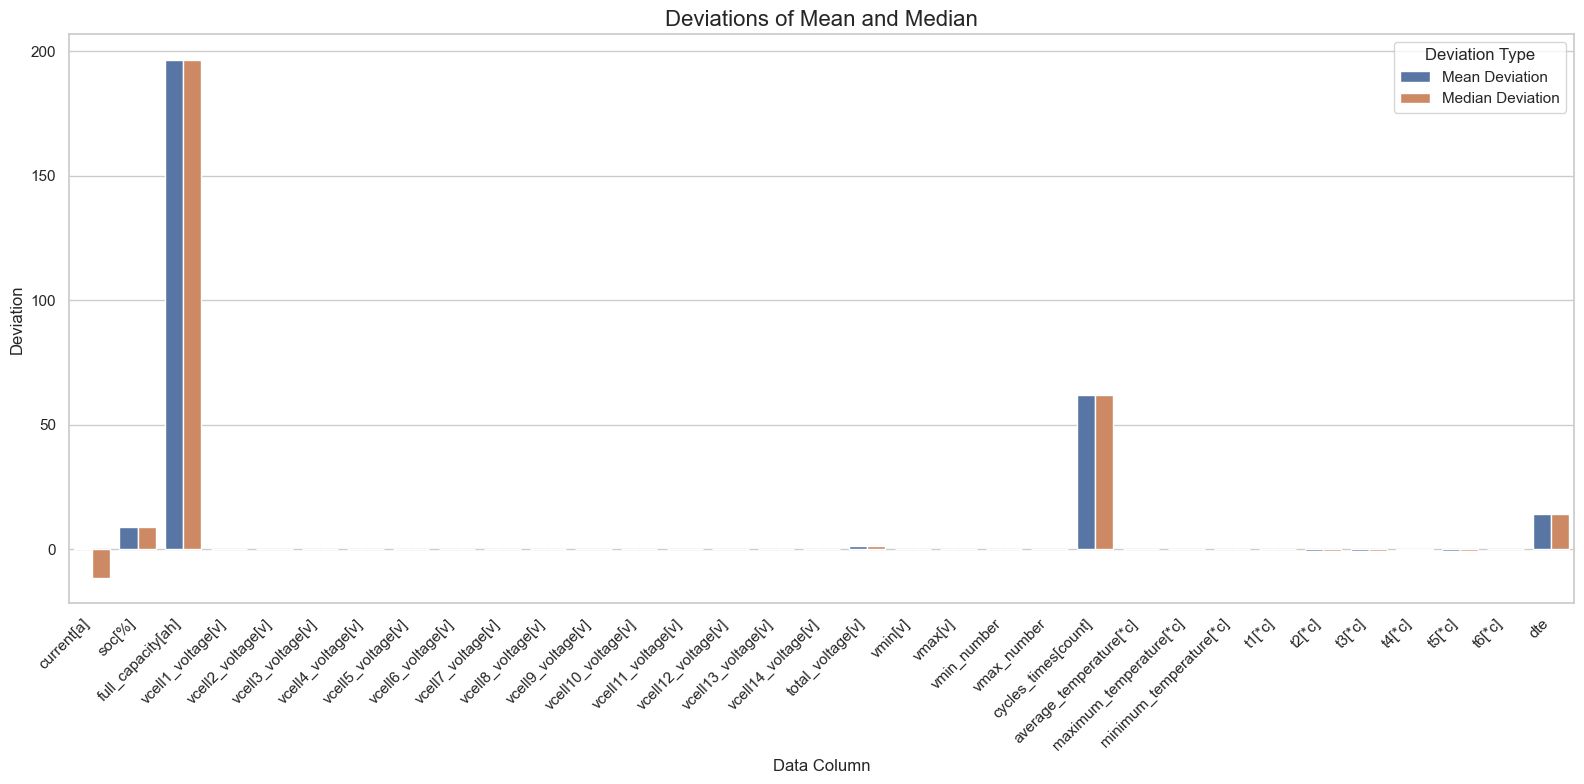

C:\Users\shett\AppData\Local\Temp\ipykernel_3224\1779834191.py:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


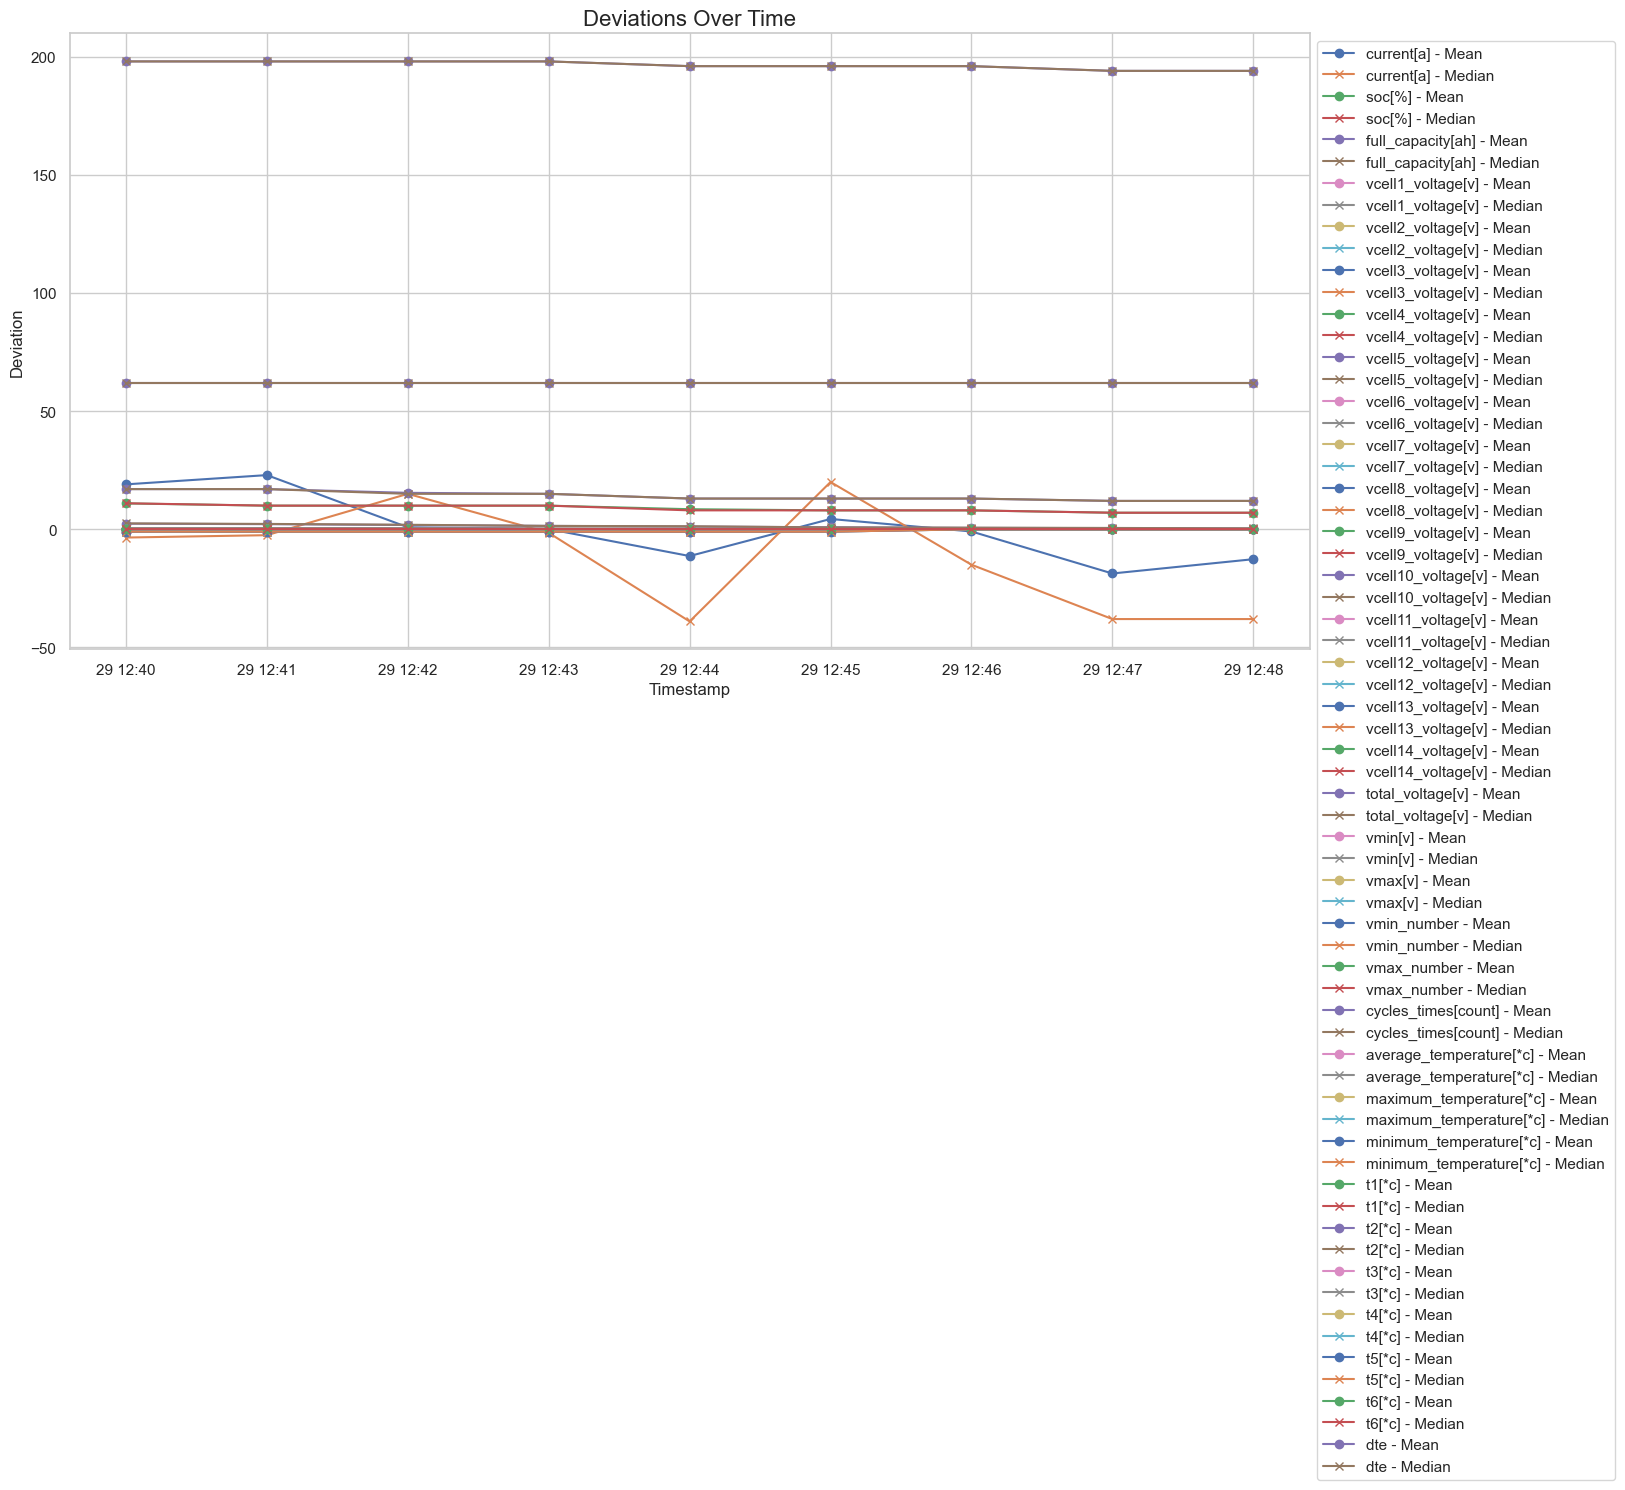

In [137]:
# Load the formatted results
results_file = "results.xlsx"
results_df = pd.read_excel(results_file)

# Remove blank rows for plotting
results_cleaned = results_df.dropna()

# Ensure timestamp is in datetime format
results_cleaned["Timestamp"] = pd.to_datetime(results_cleaned["Timestamp"])

# Plot deviations for mean and median
plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")

# Bar plot of deviations
sns.barplot(
    data=results_cleaned.melt(
        id_vars=["Timestamp", "Data Column"],
        value_vars=["Mean Deviation", "Median Deviation"],
        var_name="Deviation Type",
        value_name="Deviation"
    ),
    x="Data Column",
    y="Deviation",
    hue="Deviation Type",
    errorbar=None
)

plt.title("Deviations of Mean and Median", fontsize=16)
plt.xlabel("Data Column", fontsize=12)
plt.ylabel("Deviation", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Deviation Type")
plt.tight_layout()
plt.savefig("deviation_barplot.png")  # Save the plot as an image
plt.show()

# Line plot over timestamps
plt.figure(figsize=(16, 8))

for col in results_cleaned["Data Column"].unique():
    subset = results_cleaned[results_cleaned["Data Column"] == col]
    plt.plot(subset["Timestamp"], subset["Mean Deviation"], label=f"{col} - Mean", marker='o')
    plt.plot(subset["Timestamp"], subset["Median Deviation"], label=f"{col} - Median", marker='x')

plt.title("Deviations Over Time", fontsize=16)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Deviation", fontsize=12)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("deviation_lineplot.png")  # Save the plot as an image
plt.show()


In [159]:
# Load the cleaned results
results_file = "results.xlsx"
results_df = pd.read_excel(results_file)

# Remove blank rows for analysis
results_cleaned = results_df.dropna()

# Add absolute deviations for mean and median
results_cleaned["Absolute Mean Deviation"] = results_cleaned["Mean Deviation"].abs()
results_cleaned["Absolute Median Deviation"] = results_cleaned["Median Deviation"].abs()

# Calculate overall statistics
mean_deviation_summary = results_cleaned["Absolute Mean Deviation"].mean()
median_deviation_summary = results_cleaned["Absolute Median Deviation"].mean()

print("Average Absolute Deviations:")
print(f"Mean: {mean_deviation_summary}")
print(f"Median: {median_deviation_summary}")

# Determine which is better
if mean_deviation_summary < median_deviation_summary:
    print("Conclusion: Mean is the better aggregation method for this data.")
else:
    print("Conclusion: Median is the better aggregation method for this data.")

# Group by data column for detailed comparison
column_comparison = results_cleaned.groupby("Data Column")[["Absolute Mean Deviation", "Absolute Median Deviation"]].mean()
print("\nAverage Absolute Deviations by Data Column:")
print(column_comparison)

# Determine the preferred method per column
column_comparison["Preferred Method"] = column_comparison.apply(
    lambda row: "Mean" if row["Absolute Mean Deviation"] < row["Absolute Median Deviation"] else "Median",
    axis=1
)
print("\nPreferred Aggregation Method by Data Column:")
print(column_comparison)


Average Absolute Deviations:
Mean: 8.981677855726868
Median: 9.257757575757577
Conclusion: Mean is the better aggregation method for this data.

Average Absolute Deviations by Data Column:
                         Absolute Mean Deviation  Absolute Median Deviation
Data Column                                                                
average_temperature[*c]                 0.000000                   0.000000
current[a]                             10.094580                  19.166667
cycles_times[count]                    62.000000                  62.000000
dte                                    14.158594                  14.111111
full_capacity[ah]                     196.444444                 196.444444
maximum_temperature[*c]                 0.000000                   0.000000
minimum_temperature[*c]                 0.000000                   0.000000
soc[%]                                  8.825800                   8.777778
t1[*c]                                  0.002891   

C:\Users\shett\AppData\Local\Temp\ipykernel_3224\1910176783.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cleaned["Absolute Mean Deviation"] = results_cleaned["Mean Deviation"].abs()
C:\Users\shett\AppData\Local\Temp\ipykernel_3224\1910176783.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cleaned["Absolute Median Deviation"] = results_cleaned["Median Deviation"].abs()
